In [1]:
import pandas as pd
import seaborn as sns
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Load and plot data

In [2]:
df = pd.read_csv("data/data-mix2.txt")
print(len(df))
df.head(5)

200


,Y
0,9.44
1,9.77
2,11.56
3,10.07
4,10.13


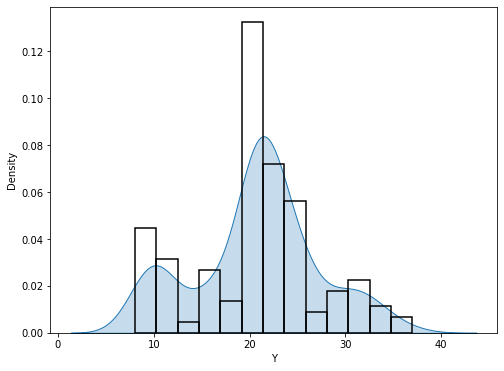

In [3]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
sns.histplot(ax=ax, x=df["Y"], stat="density", fill=False, color="k")
sns.kdeplot(ax=ax, x=df["Y"], fill=True, color="C0")
fig.show()

# Run Stan

In [4]:
# model = CmdStanModel(stan_file="model/model11-6.stan")
model = CmdStanModel(stan_file="model/model11-6b.stan")
print(model)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/chap11/model/model11-6b


CmdStanModel: name=model11-6b
	 stan_file=/workdir/chap11/model/model11-6b.stan
	 exe_file=/workdir/chap11/model/model11-6b
	 compiler_optons=stanc_options=None, cpp_options=None


In [5]:
fit11_6 = model.sample(data={
    "N": len(df),
    "K": 5,
    "Y": df["Y"].values
}, show_progress=True)

Chain 2 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]

Chain 2 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]


Chain 2 - warmup:   0%|          | 0/2000 [00:00<?, ?it/s]

Chain 3 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]

Chain 3 - warmup:   0%|          | 0/2000 [00:00<?, ?it/s]


Chain 4 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]


Chain 1 - warmup:   5%|▌         | 100/2000 [00:07<02:13, 14.27it/s]

Chain 3 - warmup:   5%|▌         | 100/2000 [00:07<02:20, 13.56it/s]


Chain 1 - warmup:  15%|█▌        | 300/2000 [00:09<01:08, 24.69it/s]


Chain 1 - warmup:  20%|██        | 400/2000 [00:10<00:49, 32.44it/s]


Chain 2 - warmup:  10%|█         | 200/2000 [00:11<02:10, 13.80it/s]


Chain 2 - warmup:  15%|█▌        | 300/2000 [00:12<01:30, 18.74it/s]


Chain 2 - warmup:  20%|██        | 400/2000 [00:13<01:04, 24.98it/s]


Chain 1 - warmup:  30%|███       | 600/2000 [00:13<00:32, 43.61it/s]


Chain 2 - warmup:  25%|██▌       | 500/2000 [00:14<00:46, 32.23it/s]


Chain 2 - w

In [6]:
fit11_6.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-2001.120,0.562725,16.5159,-2029.400,-2000.310,-1975.42,861.41,16.5217,1.01363
a[1],0.170,0.000330,0.0270,0.130,0.170,0.22,6623.00,127.0000,1.00000
a[2],0.095,0.002100,0.0310,0.050,0.094,0.14,228.00,4.4000,1.00000
a[3],0.310,0.002400,0.0720,0.190,0.310,0.42,904.00,17.0000,1.00000
a[4],0.240,0.004000,0.0890,0.092,0.240,0.39,507.00,9.7000,1.00000
...,...,...,...,...,...,...,...,...,...
sigma[197],1.500,0.014000,1.2000,0.190,1.200,3.90,7151.00,137.0000,1.00000
sigma[198],1.500,0.015000,1.2000,0.170,1.100,3.80,6966.00,134.0000,1.00000
sigma[199],1.500,0.014000,1.2000,0.150,1.100,4.00,7388.00,142.0000,1.00000
